In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datahouse

In [38]:
dataset,target=datahouse.load_iris(return_X_y=True,as_frame=True)


In [40]:
dataset['target']=target
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [85]:
X=dataset.iloc[:,0:4]
print(X.head())
y=dataset.iloc[:,4]
type(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


pandas.core.series.Series

In [53]:
# Steps Involved in PCA
# Standardize the data. (with mean =0 and variance = 1)
# Compute the Covariance matrix of dimensions.
# Obtain the Eigenvectors and Eigenvalues from the covariance matrix (we can also use correlation matrix or even Single value decomposition, however in this post will focus on covariance matrix).
# Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k largest eigenvalues (k will become the number of dimensions of the new feature subspace k≤d, d is the number of original dimensions).
# Construct the projection matrix W from the selected k Eigenvectors.
# Transform the original data set X via W to obtain the new k-dimensional feature subspace Y.

In [60]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)
X_std.shape

(150, 4)

In [61]:
#Computing covarience matrix
cov_mat=np.cov(X_std.T)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [62]:
#computing eigenvalues and eigen vectors
eig_val,eig_vect=np.linalg.eig(cov_mat)
print(eig_val)
print(eig_vect)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [72]:
#make a pair of eigen values and their eigen vectors
eig_pairs=[(np.abs(eig_val[i]),np.abs(eig_vect[:,i])) for i in range(len(eig_val))]
#Sort them in descending order
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)
#print(eig_pairs[0][0])

[(2.938085050199994, array([0.52106591, 0.26934744, 0.5804131 , 0.56485654])), (0.9201649041624873, array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (0.14774182104494804, array([0.71956635, 0.24438178, 0.14212637, 0.63427274])), (0.020853862176462498, array([0.26128628, 0.12350962, 0.80144925, 0.52359713]))]


In [73]:
# After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?”
# A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues.
# The explained variance tells us how much information (variance) can be attributed to each of the principal components.

tot=sum(eig_val)
var_exp=[(i/tot)*100 for i in sorted(eig_val,reverse=True)]
print("Variance Explained: ",var_exp)
cum_var_exp=np.cumsum(var_exp)
print("Cumulative var explained: ",cum_var_exp)
print("Percentage variance of first two principal components each is: ",var_exp[0:2])
print("Percentage variance of first two principal components together is: ",sum(var_exp[0:2]))


Variance Explained:  [72.96244541329986, 22.85076178670177, 3.6689218892828763, 0.5178709107154854]
Cumulative var explained:  [ 72.96244541  95.8132072   99.48212909 100.        ]
Percentage variance of first two principal components each is:  [72.96244541329986, 22.85076178670177]
Percentage variance of first two principal components together is:  95.81320720000163


In [75]:
# Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace,
# by choosing the “top 2” Eigenvectors with the 
# highest Eigenvalues to construct our d×k-dimensional Eigenvector matrix W.
print(eig_pairs[0][1])
print(eig_pairs[1][1])
matrix_w=np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))
matrix_w

[0.52106591 0.26934744 0.5804131  0.56485654]
[0.37741762 0.92329566 0.02449161 0.06694199]


array([[0.52106591, 0.37741762],
       [0.26934744, 0.92329566],
       [0.5804131 , 0.02449161],
       [0.56485654, 0.06694199]])

In [77]:
# In this last step, we will use the 4×2-dimensional projection matrix W 
# to transform our samples onto the new subspace via the equation Y=X×W, 
# where the output matrix Y will be a 150×2 matrix of our transformed samples.
new_subspace=X_std.dot(matrix_w)
principalDf=pd.DataFrame(data=new_subspace,columns=['principal component1','principal component2'])
principalDf

,principal component1,principal component2
0,-1.715770,0.480027
1,-2.152058,-0.674134
2,-2.187314,-0.341908
3,-2.246475,-0.597395
4,-1.716904,0.646835
...,...,...
145,1.799407,0.386966
146,0.873455,-0.896687
147,1.450074,0.269069
148,1.797714,1.011254


In [92]:
finalDf=pd.concat([principalDf,y.to_frame()],axis=1)
finalDf

,principal component1,principal component2,target
0,-1.715770,0.480027,0
1,-2.152058,-0.674134,0
2,-2.187314,-0.341908,0
3,-2.246475,-0.597395,0
4,-1.716904,0.646835,0
...,...,...,...
145,1.799407,0.386966,2
146,0.873455,-0.896687,2
147,1.450074,0.269069,2
148,1.797714,1.011254,2


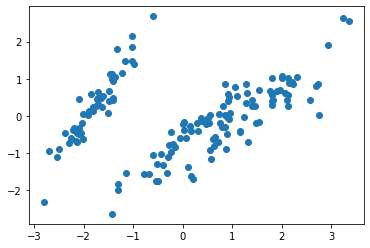

In [117]:
plt.scatter(finalDf['principal component1'],finalDf['principal component2'])

In [119]:
# Alternatively, there are direct libraries in python which compute the principal components directly and 
# no need to do all the above computations.
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) # prints the top 5 rows

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [130]:
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). 
#.95 means that we want to include 95% of the variance.
#Hence PCA will return the no of components which describe 95% of the variance.
pca=PCA(.98)
principalComponents=pca.fit_transform(X_std)
print(principalComponents.shape)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf.head(5) # prints the top 5 rows

(150, 3)


,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
